# Homework 4
# Perceptron, SVM, and PCA

# <p style="text-align: right;"> &#9989; Put your name here.</p>
# <p style="text-align: right;"> &#9989; Put your _GitHub username_ here.</p>

# Goal for this homework assignment
We have worked some basics on perceptron, SVM, and PCA in the pre-class and in-class assignments. In this homework assignment, we will:

* Continue to use git as the version control tool
* Work on unfamiliar data
* Use perceptron to classify data 
* Use SVM to classify data
* Use principal component analysis to facilitate classification


**This assignment is due by 11:59 pm on Friday, April 25th. Note that ONLY the copy on GITHUB will be graded.**  **There are 60 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.

---
# Part 1: Git repository (6 points)

You're going to add this assignment to the `cmse202-s25-turnin` repository you previously created. The history of progress on the assignment will be tracked via git commitments. 

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository. 

5. Double check to make sure your file is at the correct directory.

6. Once you're certain that file and directory are correct, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04` to push your file to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font> 
```
git clone https://github.com/RyanGroneck/CMSE202-f25-turnin.git
```

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-04` directory that you just created.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.

---
# Part 2: Deal with unfamiliar data (35 points)

## Warm up with perceptron for binary classification
## 2.1 Load up the dataset

This data is obtained from Kaggle/diabetes. It contains multiple measured values and a label for whether the patient is diagnosed as diabetic. 

* Use commands to dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv`
* Use Pandas to load in the data and briefly examine it.
* Succeed data load-up gets **2 pt**. 

In [1]:
# put your code here
#!curl -O https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv
import pandas as pd
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


How many patients are in this dataset? What are features of the patients?

In [2]:
print(len(df))
print(df.columns)

100000
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


<font size=6 color="#009600">&#9998;</font> 

There are 100000 rows with the following columns:
'gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'

### Use your perceptron class built in Day18 and Day19 assignments to classify whether patients are diabetic.

* You should see that there are some features that are non-numerics.
* The first one is `gender`. Find the types of classes and convert them to numerics in your dataframe.
* The second one is `smoking_history`, convert those string labels to numerics.
* Note that since perceptron is a binary classifier, which only determines which side of the dividing line the data points reside, we should also convert the labels to `+1` and `-1`.
* Completing data conversion gets **5 pt**.

In [3]:
# put your code here
import numpy as np
gender_label = np.zeros_like(df.loc[:,'gender'])

for i, gender in enumerate(df.loc[:,'gender']):
    if gender == 'Female':
        gender_label[i] = 1
    else:
        gender_label[i] = -1

dfClean = df.copy()

dfClean['gender'] = gender_label

dfClean.head(5)     


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,-1,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,-1,76.0,1,1,current,20.14,4.8,155,0


In [4]:
name_counts = df['smoking_history'].value_counts().to_dict()
print(name_counts)

groups = df['smoking_history'].unique()

for label in groups:
    dfClean[label] = np.zeros_like(df['smoking_history'])



for i, label in enumerate(df['smoking_history']):
    dfClean.loc[i, label] = 1
    for j,label_val in enumerate(dfClean.iloc[i,9:]):
        if label_val == 0:
            dfClean.iloc[i,j+9] = -1

# I asked ChatGPT 4o 'While this code workes to change labels, but can I do it in a simpler way?', copying in the code used to adjust the gender labels. I then used that to make the following
dfClean['hypertension'] = df['hypertension'].map({0: -1, 1: 1})
dfClean['heart_disease'] = df['heart_disease'].map({0: -1, 1: 1})
dfClean['diabetes'] = df['diabetes'].map({0: -1, 1: 1})

try:
    dfClean = dfClean.drop('smoking_history', axis = 1)
except:
    pass

dfClean

{'No Info': 35816, 'never': 35095, 'former': 9352, 'current': 9286, 'not current': 6447, 'ever': 4004}


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,never,No Info,current,former,ever,not current
0,1,80.0,-1,1,25.19,6.6,140,-1,1,-1,-1,-1,-1,-1
1,1,54.0,-1,-1,27.32,6.6,80,-1,-1,1,-1,-1,-1,-1
2,-1,28.0,-1,-1,27.32,5.7,158,-1,1,-1,-1,-1,-1,-1
3,1,36.0,-1,-1,23.45,5.0,155,-1,-1,-1,1,-1,-1,-1
4,-1,76.0,1,1,20.14,4.8,155,-1,-1,-1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,80.0,-1,-1,27.32,6.2,90,-1,-1,1,-1,-1,-1,-1
99996,1,2.0,-1,-1,17.37,6.5,100,-1,-1,1,-1,-1,-1,-1
99997,-1,66.0,-1,-1,27.83,5.7,155,-1,-1,-1,-1,1,-1,-1
99998,1,24.0,-1,-1,35.42,4.0,100,-1,1,-1,-1,-1,-1,-1


### Now all feature varilables are numerics.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---

## 2.2 Binary perceptron classifier

Copy your perceptron class to the cell below. 

* DO NOT use the one from statsmodel. We want to test the perceptron you built.
* Note that your predict method should output `+1` or `-1` for positive or negative values, respectively.
* A functional perceptron classifier gets **4 pt**.

In [5]:
# copy your perceptron class to his cell

class my_perceptron():

    def __init__ (self, labeled_data, iters, learning_rate):        
        # attributes now are: data, weights, iterations, learning rate

        self.data = labeled_data
        self.weights = np.ones(len(self.data[0]))
        self.iters = iters
        self.learning_rate = learning_rate

        
        
    def predict(self, feature_set):
        result = np.dot(feature_set, self.weights[1:]) + self.weights[0]
        if (result> 0):
            return 1
        else:
            return -1


    
    def fit(self):
        # for all iterations
        #    for each row in the data
        #        find the update value, changes the weights (including bias weight)

        for i in range(self.iters):
            for data_point in self.data:
                class_label = data_point[-1]
                prediction_label = self.predict(data_point[:-1])
                self.weights[0] = self.weights[0] + self.learning_rate * (class_label - prediction_label)
                for j in range(1,len(data_point)):
                    self.weights[j] = self.weights[j] +  (self.learning_rate * (class_label - prediction_label) * data_point[j-1])
                    

    def errors(self):
        # how many rows of the data don't match the provided label?
        count = 0
        for data_point in self.data:
            if data_point[-1] != self.predict(data_point[:-1]):
                count += 1
        return count, self.weights

* Split data to 70-30 train-test sets **1 pt**.
* Train your perceptron.
* Show the accuracy of your pereptron **2 pt**.

In [6]:
# put your code here
from sklearn.model_selection import train_test_split

data = dfClean.drop(columns=['diabetes'])
data['diabetes'] = dfClean.loc[:,'diabetes']

train_data, test_data = train_test_split(data, test_size=0.3, random_state=10)

model = my_perceptron(np.array(train_data), iters=10, learning_rate=0.01)
model.fit()
errors, weights = model.errors()
print(f"Training errors: {errors}")

Training errors: 5915


In [7]:
print("accuracy:", (len(train_data)-errors)/len(train_data))

accuracy: 0.9155


* Use test set to evaulate the accuracy of your perceptron. What is your accuracy? (**2 pt**)

In [8]:
# put your code here
model.data = np.array(test_data)
errors, weights = model.errors()
print(f"Testing errors: {errors}")
(1-errors)/len(test_data)
print("accuracy:", (len(test_data)-errors)/len(test_data))

Testing errors: 2535
accuracy: 0.9155


* There may be some ways to increase the accruacy, such as increasing the number of train iterations or adjust learning rate. Give a try to train a perceptron you can best get. Record the values of parameters and the optimal accuracy. (**3 pt**)


In [9]:
# put your code here
model = my_perceptron(np.array(train_data), iters=300, learning_rate=0.001)
model.fit()
errors, weights = model.errors()
print(f"Training errors: {errors}")
print(f"Training accuracy: {(len(train_data)-errors)/len(train_data)}")

model.data = np.array(test_data)
errors, weights = model.errors()
print(f"Testing errors: {errors}")
print(f"Treting accuracy: {(len(test_data)-errors)/len(test_data)}")


Training errors: 2848
Training accuracy: 0.9593142857142857
Testing errors: 1203
Treting accuracy: 0.9599


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### 2.3 Next we shall test perceptron's capability of multiple-label classification.

* Dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv`.
* This is a customer category dataset (Kraggle/Customer Classification). Each cusmtoer has several feature variables.
* There are five categories of customers, which are non-numerics. Thus, let's convert those string labels to numerics.
* Successful data load-up gets **2 pt**.

In [10]:
# Download and load the dataset. Convert non-numerical labels to numerics.
# put your code here
#!curl -O https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv
customer_df = pd.read_csv('Telecust1.csv')
print(customer_df['custcat'].unique())
customer_df.head(10)

['A' 'D' 'C' 'B']


,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C
5,2,41,39,78,0,17,2,16,0,1,1,C
6,3,45,22,19,1,2,2,4,0,1,5,B
7,2,38,35,76,0,5,2,10,0,0,3,D
8,3,45,59,166,1,7,4,31,0,0,5,C
9,1,68,41,72,1,21,1,22,0,0,3,B


---
### 2.4 Multi-label perceptron classification

* As we know, perceptron is a binary classifier. For multiple-label classification, we can use One-vs-Rest (OvR) Strategy.
* In this case, let's train five individual perceptrons. 
* For each classifier, it treats the current class as "positive" and all others as "negative."
* When classifying a new sample, each classifier gives a "score," and the class with the highest score is chosen.

Copy your perceptron to the code cell below. We need to add a score method, which outputs dot of weights and features, as opposed to the previous binary predict method. The score method should output a signed floating score value, not `+1` or `-1`. This can be done by removing the binary segmenting, i.e., directly outputing the dot value.

* Functioning score() method gets **2 pt**.

In [38]:
# put your modified perceptron class here
class my_perceptron():

    def __init__ (self, labeled_data, iters, learning_rate):        
        # attributes now are: data, weights, iterations, learning rate

        self.data = labeled_data
        self.weights = np.ones(len(self.data[0]))
        self.iters = iters
        self.learning_rate = learning_rate

        
        
    def predict(self, feature_set):
        result = np.dot(feature_set, self.weights[1:]) + self.weights[0]
        if (result> 0):
            return 1
        else:
            return -1


    
    def fit(self):
        # for all iterations
        #    for each row in the data
        #        find the update value, changes the weights (including bias weight)

        for i in range(self.iters):
            for data_point in self.data:
                class_label = data_point[-1]
                prediction_label = self.predict(data_point[:-1])
                self.weights[0] = self.weights[0] + self.learning_rate * (class_label - prediction_label)
                for j in range(1,len(data_point)):
                    self.weights[j] = self.weights[j] +  (self.learning_rate * (class_label - prediction_label) * data_point[j-1])
                    

    def errors(self):
        # how many rows of the data don't match the provided label?
        count = 0
        for data_point in self.data:
            if data_point[-1] != self.predict(data_point[:-1]):
                count += 1
        return count, self.weights

    # NEW SCORE FUNCTION - for this to work as you want it to and without making a seperate 'predict' function it needs to go through the whole data set
    def score(self, features):
        result = []
        for feature_set in features:
            score_value = np.dot(feature_set, self.weights[1:]) + self.weights[0]
            result.append(score_value)
        return result

        

* Now let's do a train-test split of the data with a test_size = 0.3.
* Since we are training 5 perceptrons, we should have have 5 class label sets. For instance, in the label set for category A, the label value will be `+1` if it's type A and otherwise `-1`.
* Setting label sets gets **4 pt**.

In [39]:
# put your code here

#I could not tell if this wanted for there to be one data frame/array that had all columns/labels, or if it wanted it like this below with several dfs.

#also as this shows, there are only 4 categories, so idk what you are talking about when you say 5 perceptrons
print(customer_df['custcat'].unique())
customer_df_cat = customer_df.drop(columns= 'custcat')

customer_df_cat['cat_A'] = customer_df['custcat'].map({'A': 1, 'B': -1, 'C': -1, 'D': -1})

customer_df_cat['cat_B'] = customer_df['custcat'].map({'A': -1, 'B': 1, 'C': -1, 'D': -1})

customer_df_cat['cat_C'] = customer_df['custcat'].map({'A': -1, 'B': -1, 'C': 1, 'D': -1})

customer_df_cat['cat_D'] = customer_df['custcat'].map({'A': -1, 'B': -1, 'C': -1, 'D': 1})

customer_df_cat


['A' 'D' 'C' 'B']


,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,cat_A,cat_B,cat_C,cat_D
0,2,13,44,64,1,9,4,5,0,0,2,1,-1,-1,-1
1,3,11,33,136,1,7,5,5,0,0,6,-1,-1,-1,1
2,3,68,52,116,1,24,1,29,0,1,2,-1,-1,1,-1
3,2,33,33,33,0,12,2,0,0,1,1,1,-1,-1,-1
4,2,23,30,30,1,9,1,2,0,0,4,-1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,27,0,0,3,0,0,1,3,1,-1,-1,-1
996,1,7,34,22,0,2,5,5,0,1,1,1,-1,-1,-1
997,3,67,59,944,0,40,5,33,0,1,1,-1,-1,-1,1
998,3,70,49,87,0,18,2,22,0,1,1,-1,-1,1,-1


* Use training set and the 5 training label sets to train your 5 perceptrons. Report the accuracy of those five training.
* Efficiently train the five perceptrons using nest loop gets **5 pt**.


In [66]:
# put your code here
Train_Data, Test_Data = train_test_split(customer_df_cat, test_size=0.3, random_state=10)
customer_train_df, customer_test_df = train_test_split(customer_df, test_size=0.3, random_state=10)

customer_labels = ['cat_A', 'cat_B', 'cat_C', 'cat_D']

customer_features_train = Train_Data.drop(columns=customer_labels)
customer_features_test = Test_Data.drop(columns=customer_labels)

cust_models = {}


for category in customer_labels:
    data = customer_features_train.copy()

    
    data['custcat'] = Train_Data[category].values 

    full_data = np.array(data, dtype=float) 
    

    model = my_perceptron(full_data, iters=300, learning_rate=0.001)
    model.fit()
    

    cust_models[category] = model

    errors, weights = model.errors()
    print(f"Training errors for {category}: {errors}")
    print(f"Training Accuracy for {category}: {(len(full_data) - errors) / len(full_data):.4f}")
    print('\n')

Training errors for cat_A: 377
Training Accuracy for cat_A: 0.4614


Training errors for cat_B: 239
Training Accuracy for cat_B: 0.6586


Training errors for cat_C: 215
Training Accuracy for cat_C: 0.6929


Training errors for cat_D: 193
Training Accuracy for cat_D: 0.7243




* Use the test vector to examine the accuracy.
* For each feature set, there should be 5 output scores, each from a perceptron. The predicted label should be the label that corresponds to the highest score.
* Report your accuracy. (**3 pt**)

In [67]:
# put your code here
scores = {}

for category, model in cust_models.items(): 
    predictions = model.score(customer_features_test.values)
    scores[category] = predictions

scores

all_scores = np.array(list(scores.values())).T  # shape: (num_samples, num_categories)

# 2. Find which category has the max score for each sample
predicted_indices = np.argmax(all_scores, axis=1)

# 3. Map indices to actual category names
predicted_categories = [customer_labels[i] for i in predicted_indices]

predicted_categories = pd.Series(predicted_categories).map({'cat_A': 'A', 'cat_B': 'B', 'cat_C': 'C', 'cat_D': 'D'})

count = 0

for real, predict in zip(customer_test_df['custcat'], predicted_categories):
    if real == predict:
        count += 1

accuracy = count / len(predicted_categories)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.3533


How good is your multiple-label perceptron classification?

<font size=6 color="#009600">&#9998;</font>

it is slightly better than random, as a random guess would get about 25% accuracy but ours gets to about 35 (I tested some different amounts of iterations and learning rates, I could be convinced that by exploring the hyper-parameter space more you could get up to 40, as I got it from 30 to 35 with crude adjustments.


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
## Part 3 SVM classifiers (19 points)

### 3.1 SVM 

Let's re-use the customer category data. There are five caterogies with multiple feature variables.

* Use sklearn library to build a SVM classifier. Since we do not know what the best parametes are, perform a GridSearch for best parameters.
* NOTE: Because the dataset contains a large number of points, it's expected to have a long computer running time for GridSearch. Thus, let's use only the first 200 data points for GridSearch. You can start the grid search parameter like the image below. However, **NOTE** that if the kernal used cannot find a hyperplane to classify data points, the GridSearch function will stall. You need to manually remove that kernal from the parameter set and re-run GridSearch.
  
<img src="https://i.ibb.co/JWrp6c4q/Grid-Search-Param.png" width="650">


* As in the previous section, make a 70-30 train-test split and train your SVM classifier.
* Complete GridSearch to extract best parameters gets **5 pt**.

In [76]:
# put your code here.
from sklearn import svm
from sklearn.model_selection import GridSearchCV

svm_cust_labels = customer_df['custcat']
svm_cust_features = customer_df.drop(columns='custcat')

X_train, X_test, y_train, y_test = train_test_split(svm_cust_features[:500], svm_cust_labels[:500], test_size=0.3, random_state=10)


model = svm.SVC()
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'sigmoid']
}

clf = GridSearchCV(model, param_grid, refit=True, cv=5)
clf.fit(X_train, y_train)

print("Best Parameters:", clf.best_params_)

Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [77]:
test_accuracy = clf.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Test Set Accuracy: 0.4400


* Examine the accuracy of this SVC and report the accuracy. Draw a confusion matrix. **2 pt**

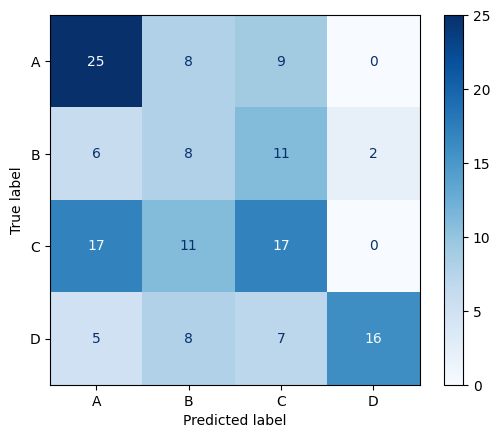

In [78]:
# put your code here

#I copied my code into chatGPT 4o and asked 'using this as referece, how can I generate a confusion matric?'

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Get model predictions
y_pred = clf.predict(X_test)

# Step 2: Build the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)  # Align labels

# Step 3: Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")


Does SVM classifier work much better than your percetron?

<font size=6 color="#009600">&#9998;</font> 

only slightly, even after having it use the first 500 points it was only around 44% accurate, which is better but only slightly

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
### 3.2 PCA 

Although we only have 11 feature variables in the dataset, let's examine how much principal component analysis (PCA) can accelerate the classification. We will increase the PCA components from 1 to 11. For each case, we will perform a GridSearch and use test set to examine the accuracy. 

* Write a code to loop over n_components = 1 through 11. **4 pt**
* Record the accuracy of each case and plot the profile of accuracy versus n_components. In the mean time, record the computer run times and plot the profile of time versus n_components. **2 pt**




In [17]:
# put your code here



Please answer the following questions. 
* How is the overall accuracy of this SVM classifier?  **1 pt**
* If the performance is not good, what do you think the cause is? **2 pt**

<font size=6 color="#009600">&#9998;</font> Put your answer here

* Describe the curves of time vs n_components and accuracy vs n_components. **1 pt**
* Explain why the curves behave as they are in the figures **2 pt**

<font size=6 color="#009600">&#9998;</font> Put your answer here

### &#128721; STOP (1 Point)
**Pause, save and commit your FINAL changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**



In [18]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University